## Unsupervised Maching Learning: Clustering

### Import Libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

### Import Data

In [2]:
# Create a path
path = r'C:\Users\ariel\OneDrive\Desktop\School work\Achievement 6'

In [3]:
# Importing data set
df = pd.read_csv(os.path.join(path, 'Data', 'cardatanew.csv'), index_col=False)

In [4]:
# This ensures graphs are displayed without the need to call them
%matplotlib inline

In [5]:
df.shape

(6976702, 46)

In [6]:
df.head()

Unnamed: 0   ID   Source  Severity           Start_Time  \
0           0  A-1  Source2         3  2016-02-08 05:46:00   
1           1  A-2  Source2         2  2016-02-08 06:07:59   
2           2  A-3  Source2         2  2016-02-08 06:49:27   
3           3  A-4  Source2         3  2016-02-08 07:23:34   
4           4  A-5  Source2         2  2016-02-08 07:39:07   

              End_Time  Start_Lat  Start_Lng  Distance(mi)  \
0  2016-02-08 11:00:00  39.865147 -84.058723          0.01   
1  2016-02-08 06:37:59  39.928059 -82.831184          0.01   
2  2016-02-08 07:19:27  39.063148 -84.032608          0.01   
3  2016-02-08 07:53:34  39.747753 -84.205582          0.01   
4  2016-02-08 08:09:07  39.627781 -84.188354          0.01   

                                         Description  ... Turning_Loop  Year  \
0  Right lane blocked due to accident on I-70 Eas...  ...        False  2016   
1  Accident on Brice Rd at Tussing Rd. Expect del...  ...        False  2016   
2  Accident on OH-32 State Route 32 Westbound at ...  ...        False  2016   
3  Accident on I-75 Southbound at Exits 52 52B US...  ...        False  2016   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...  ...        False  2016   

  Month Day Severity Scale     Weather_Category  Temperature_Category  Hour  \
0     2   8       Moderate        Rainy/Drizzly              Moderate     5   
1     2   8       Moderate        Rainy/Drizzly              Moderate     6   
2     2   8       Moderate      Cloudy/Overcast              Moderate     6   
3     2   8       Moderate  Clear/Partly Cloudy              Moderate     7   
4     2   8       Moderate  Clear/Partly Cloudy              Moderate     7   

   Time_of_Day  State_Full  
0        Night        Ohio  
1      Morning        Ohio  
2      Morning        Ohio  
3      Morning        Ohio  
4      Morning        Ohio  

[5 rows x 46 columns]

### Pre-processing and Preparing Data for Elbow Technique

In [7]:
# Remove Unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed:')]

In [8]:
print(df.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  Distance(mi)  \
0  39.865147 -84.058723          0.01   
1  39.928059 -82.831184          0.01   
2  39.063148 -84.032608          0.01   
3  39.747753 -84.205582          0.01   
4  39.627781 -84.188354          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at ...   
3  Accident on I-75 Southbound at Exits 52 52B US...   
4  Accident on McEwen Rd at OH-725 Miamisburg 

In [9]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Year',
       'Month', 'Day', 'Severity Scale', 'Weather_Category',
       'Temperature_Category', 'Hour', 'Time_of_Day', 'State_Full'],
      dtype='object')

In [18]:
# Dropping categorical columns
columns_to_drop = ['ID', 'Severity', 'Start_Lat', 'Start_Time', 'End_Time', 'Start_Lng', 'Year', 'Month', 'Day', 'Hour', 'Source', 'Description', 'Street', 'City', 'County', 'State', 
                   'Zipcode', 'Country', 'Weather_Condition', 'Amenity', 'Bump', 
                   'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 
                   'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 
                   'Turning_Loop', 'Time_of_Day', 'State_Full', 'Weather_Category', 
                   'Temperature_Category', 'Severity Scale']


In [19]:
df2 = df.drop(columns=columns_to_drop)

In [20]:
df2.head()

Distance(mi)  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0          0.01            36.9      58.247455         91.0         29.68   
1          0.01            37.9      58.247455        100.0         29.65   
2          0.01            36.0      33.300000        100.0         29.67   
3          0.01            35.1      31.000000         96.0         29.64   
4          0.01            36.0      33.300000         89.0         29.65   

   Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
0            10.0              7.0               0.02  
1            10.0              7.0               0.00  
2            10.0              3.5               0.00  
3             9.0              4.6               0.00  
4             6.0              3.5               0.00

In [24]:
# Apply Standard Scaler to Standardize the Data
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

In [31]:
# Convert back to DataFrame for better readability
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)

In [32]:
df2_scaled.head()

Distance(mi)  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0          0.01            36.9      58.247455         91.0         29.68   
1          0.01            37.9      58.247455        100.0         29.65   
2          0.01            36.0      33.300000        100.0         29.67   
3          0.01            35.1      31.000000         96.0         29.64   
4          0.01            36.0      33.300000         89.0         29.65   

   Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
0            10.0              7.0               0.02  
1            10.0              7.0               0.00  
2            10.0              3.5               0.00  
3             9.0              4.6               0.00  
4             6.0              3.5               0.00

### The Elbow Technique

In [33]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [34]:
score = [kmeans[i].fit(df2_scaled).score(df2_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8757232690.774565,
 -5294880333.225833,
 -3504371528.7434735,
 -2993812416.8760047,
 -2471078932.3331823,
 -2219035950.339317,
 -2000144944.8209293,
 -1743727175.7433076,
 -1588580139.5320308]

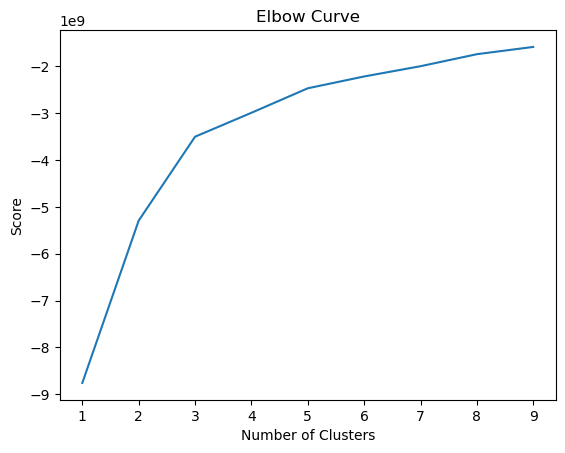

In [35]:
# Plot the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### The elbow curve seems to flatten out the most after 5, so I will be using 5 clusters.

### K-means Clustering

In [36]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [37]:
# Fit the k-means object to the data.

kmeans.fit(df2_scaled)

KMeans(n_clusters=5)

In [38]:
df2_scaled['clusters'] = kmeans.fit_predict(df2_scaled)

In [39]:
df2_scaled.head()

Distance(mi)  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  \
0          0.01            36.9      58.247455         91.0         29.68   
1          0.01            37.9      58.247455        100.0         29.65   
2          0.01            36.0      33.300000        100.0         29.67   
3          0.01            35.1      31.000000         96.0         29.64   
4          0.01            36.0      33.300000         89.0         29.65   

   Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  clusters  
0            10.0              7.0               0.02         3  
1            10.0              7.0               0.00         3  
2            10.0              3.5               0.00         4  
3             9.0              4.6               0.00         4  
4             6.0              3.5               0.00         4

In [40]:
df2_scaled['clusters'].value_counts()

clusters
3    1966793
2    1428509
0    1428234
4    1090356
1    1062810
Name: count, dtype: int64

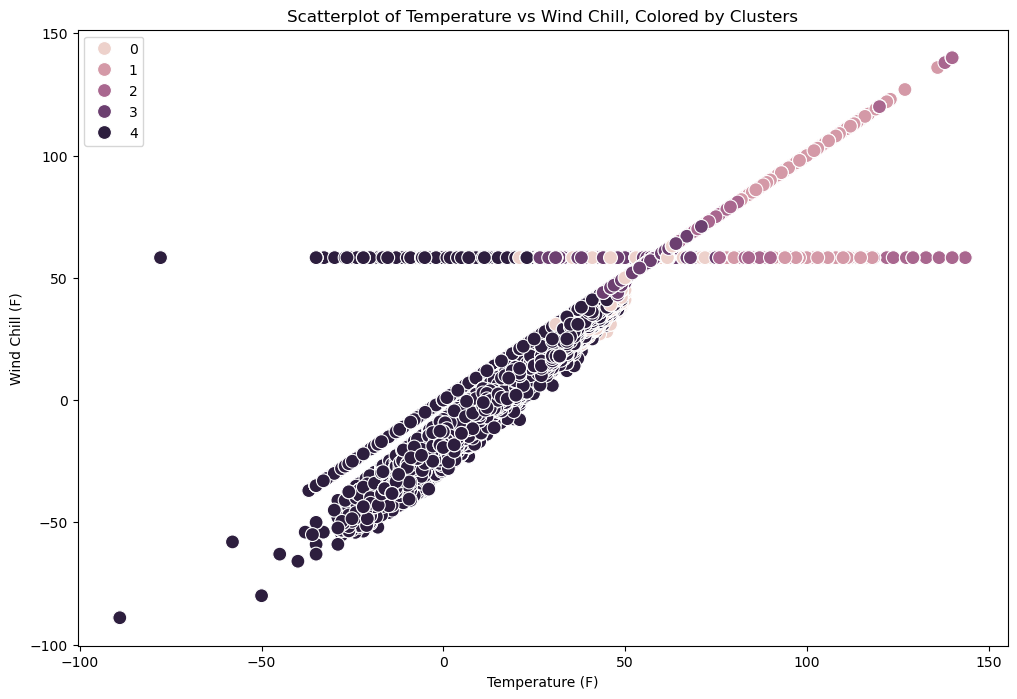

In [41]:
# Plotting clusters for Temperature and Wind Chill 
plt.figure(figsize=(12,8))
sns.scatterplot(data=df2_scaled, x='Temperature(F)', y='Wind_Chill(F)', hue=kmeans.labels_, s=100)
plt.title('Scatterplot of Temperature vs Wind Chill, Colored by Clusters')
plt.xlabel('Temperature (F)')
plt.ylabel('Wind Chill (F)')
plt.show()

In [42]:
# Plotting clusters for Distance and Visibility
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df2_scaled, x='Distance(mi)', y='Visibility(mi)', hue=kmeans.labels_, s=100)
plt.title('Scatterplot of Distance vs Visibility, Colored by Clusters')
plt.xlabel('Distance (mi)')
plt.ylabel('Visibility (mi)')
plt.show()

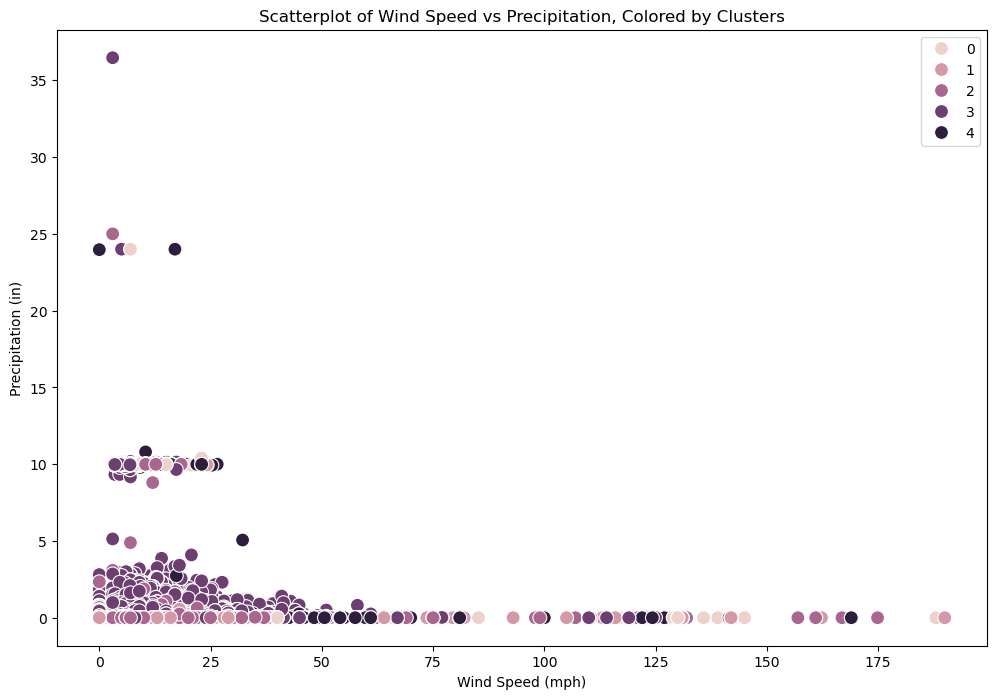

In [43]:
# Plotting clusters for Wind Speed and Precipitation
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df2_scaled, x='Wind_Speed(mph)', y='Precipitation(in)', hue=kmeans.labels_, s=100)
plt.title('Scatterplot of Wind Speed vs Precipitation, Colored by Clusters')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Precipitation (in)')
plt.show()

#### Temperature and wind chill seem to display a relationship and it is in the form of linear lines, which shows that this analysis is not fit for these variables.  

In [44]:
df.loc[df2_scaled['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df2_scaled['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df2_scaled['clusters'] == 2, 'cluster'] = 'pink'
df.loc[df2_scaled['clusters'] == 1, 'cluster'] = 'palevioletred'
df.loc[df2_scaled['clusters'] == 0, 'cluster'] = 'salmon'

### Descriptive Statistics

In [45]:
df.groupby('cluster').agg({'Distance(mi)':['mean', 'median'], 
                         'Temperature(F)':['mean', 'median'], 
                         'Wind_Chill(F)':['mean', 'median'],
                          'Humidity(%)':['mean', 'median'],
                           'Pressure(in)':['mean', 'median'],
                           'Visibility(mi)':['mean', 'median'],
                           'Wind_Speed(mph)':['mean', 'median'],
                          'Precipitation(in)':['mean', 'median']})

Distance(mi)        Temperature(F)        Wind_Chill(F)  \
                      mean median           mean median          mean   
cluster                                                                 
dark purple       0.746695  0.042      31.287174   33.0     25.637152   
palevioletred     0.499470  0.010      79.386499   79.0     73.005393   
pink              0.487051  0.014      79.030194   79.0     73.604995   
purple            0.439274  0.000      60.945715   61.0     59.588766   
salmon            0.490448  0.010      55.383237   56.8     54.050913   

                         Humidity(%)        Pressure(in)         \
                  median        mean median         mean median   
cluster                                                           
dark purple    28.000000   77.472324   79.0    29.262568  29.68   
palevioletred  72.000000   29.991428   31.0    29.270654  29.74   
pink           75.000000   63.962905   63.0    29.727810  29.89   
purple         58.247455   87.259651   88.0    29.743627  29.90   
salmon         58.247455   51.997443   53.0    29.604631  29.88   

              Visibility(mi)        Wind_Speed(mph)        Precipitation(in)  \
                        mean median            mean median              mean   
cluster                                                                        
dark purple         8.026734   10.0        8.151818    7.0          0.006065   
palevioletred      10.000862   10.0        8.565076    8.0          0.000362   
pink                9.804691   10.0        8.343574    8.0          0.002050   
purple              8.117322   10.0        6.221813    6.0          0.015674   
salmon              9.966630   10.0        7.807144    7.0          0.001161   

                      
              median  
cluster               
dark purple      0.0  
palevioletred    0.0  
pink             0.0  
purple           0.0  
salmon           0.0

#### The numeric variables in my data set do not identify distinct groups, and the clustering model does not provide significant new insights. I need to analyze the categorical variables in my data set. However, it has been significantly helpful to learn how to run this type of analysis.